In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from matplotlib import font_manager as fm

In [3]:
food_waste = pd.read_csv("../data/train_data/01_음식물쓰레기_FOOD_WASTE_210811_update.CSV", encoding = 'cp949', low_memory=False)

In [4]:
jiyeok = pd.read_csv('../data/train_data/dong_geo.csv', encoding='cp949')

In [5]:
jiyeok = jiyeok.rename(columns = {'address' : 'emd_nm'})

In [6]:
food_waste = pd.merge(food_waste, jiyeok, on = 'emd_nm')

In [7]:
pivot_data =  pd.pivot_table(data = food_waste, index = 'emd_nm', columns = 'base_date', values = 'em_g')

In [8]:
pivot_data.loc[:, "2019-01-01":"2020-01-01"]

base_date,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,...,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31,2020-01-01
emd_nm,,,,,,,,,,,,,,,,,,,,,
건입동,52326.785714,53516.071429,50743.103448,46410.714286,52555.172414,58462.068966,49794.827586,55315.517241,46360.344828,50946.551724,...,49783.333333,50986.206897,52255.172414,43870.000000,42711.666667,51620.689655,45991.071429,52340.000000,45282.758621,43918.333333
구좌읍,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9530.487805,7962.727273,10102.777778,10739.583333,9707.407407,10361.016949,8809.259259,8031.250000,11574.107143,8446.666667
남원읍,30103.409091,38948.913043,36527.272727,38823.809524,36264.634146,43642.500000,33191.025641,38338.461538,42052.702703,35118.421053,...,45271.000000,40723.469388,41738.000000,35698.979592,48197.000000,43383.333333,32120.652174,58808.333333,37655.000000,38812.000000
노형동,54959.731544,61245.065789,59993.000000,49919.281046,58536.666667,63144.407895,61272.368421,54161.513158,55818.300654,55443.000000,...,58606.944444,52642.657343,57545.804196,53421.875000,53204.513889,60118.345324,57236.551724,66889.860140,54441.134752,59085.611511
대륜동,60412.962963,67801.724138,64501.785714,53844.444444,69628.571429,73692.592593,63393.103448,60883.333333,59508.928571,61516.666667,...,70242.857143,64291.071429,68883.333333,64582.142857,63230.357143,62578.571429,63003.703704,83229.629630,61407.142857,68785.714286
대정읍,39161.627907,31802.173913,43152.564103,38103.488372,45459.523810,43681.818182,43381.707317,38729.787234,42109.523810,45751.111111,...,37809.459459,43386.231884,46448.484848,46705.384615,44669.718310,49226.056338,33154.687500,49394.927536,52226.923077,46193.939394
대천동,60744.000000,70566.000000,55857.407407,54150.000000,62670.370370,61868.518519,63625.000000,52969.230769,51876.923077,62321.153846,...,57248.437500,47426.562500,65872.580645,53922.580645,58010.000000,54690.625000,47350.000000,71833.870968,54238.709677,64630.645161
도두동,19595.652174,28338.000000,23300.000000,19393.181818,21692.857143,22476.086957,33460.869565,23529.545455,22185.000000,19264.285714,...,22734.090909,23175.000000,22465.909091,22381.818182,35602.272727,29818.181818,19772.727273,28447.727273,18452.272727,24400.000000
동홍동,90008.974359,90848.750000,80308.974359,69609.459459,82904.166667,88154.166667,89019.117647,75811.428571,72258.571429,75595.714286,...,91327.777778,88366.666667,85587.777778,89547.777778,90114.444444,94464.444444,69737.777778,120586.666667,91510.000000,95423.333333


In [9]:
np.cumsum(pivot_data[pivot_data.index == '구좌읍'].isna().values)

array([  1,   2,   3, ..., 677, 677, 677])

In [10]:
df = pivot_data.loc[:, "2019-11-07":"2021-06-31"]

In [11]:
df = df.T.fillna(method='ffill').T

In [12]:
df = df.T

In [13]:
def get_kl_similarity_matrix(sim_matrix):
    import numpy as np
    import pandas as pd
    from scipy.spatial import distance
    import sys

    # Calculate probability
    probability = []
    for i, values in sim_matrix.iteritems():
        freq = np.histogram(values)
        prob = np.asarray(freq[0]) / sum(freq[0])
        for ix, x in enumerate(prob):
            if x == 0:
                prob[ix] = sys.float_info.epsilon

        probability.append(prob)

    prob_waste = pd.DataFrame(probability)
    num_dong = len(sim_matrix.columns)
    dong_ids = sim_matrix.columns.to_list()

    # shape
    dist_mx = np.zeros((num_dong, num_dong), dtype=np.float32)

    # set_index
    prob_waste['idx'] = [x for x in dong_ids]
    prob_waste = prob_waste.set_index('idx')

    # Builds dong id to index map.
    dong_id_to_ind = {}
    for i, dong_id in enumerate(dong_ids):
        dong_id_to_ind[dong_id] = i

    for idx,row in prob_waste.iterrows():
        print(idx)
        for idx2,row2 in prob_waste.iterrows():
            if idx == idx2:
                dist_mx[dong_id_to_ind[idx], dong_id_to_ind[idx2]] = 1
            else:
                kl = distance.jensenshannon(row,row2)  # kl divergence는 wrong method일 수 있어서 Jensen-Shannon distance 를 이용함
                rescale_kl = 1 / (1 +kl)
                dist_mx[dong_id_to_ind[idx], dong_id_to_ind[idx2]] = rescale_kl

    kl_adj_mx = pd.DataFrame(dist_mx)
    kl_adj_mx.columns = dong_ids
    kl_adj_mx.index= dong_ids

    return kl_adj_mx

In [14]:
kl_adj_mx = get_kl_similarity_matrix(df)

건입동
구좌읍
남원읍
노형동
대륜동
대정읍
대천동
도두동
동홍동
봉개동
삼도1동
삼도2동
삼양동
서홍동
성산읍
송산동
아라동
안덕면
알수없음
애월읍
연동
영천동
예래동
오라동
외도동
용담1동
용담2동
이도1동
이도2동
이호동
일도1동
일도2동
정방동
조천읍
중문동
중앙동
천지동
표선면
한경면
한림읍
화북동
효돈동


In [15]:
for i, values in df.iteritems():
    freq = np.histogram(values)
    prob = np.asarray(freq[0]) / sum(freq[0])
    for ix, x in enumerate(prob):
        if x == 0:
            prob[ix] = sys.float_info.epsilon
    break

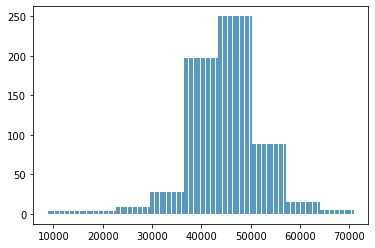

In [16]:
for i in range(9) :
    for n in range(int(freq[1][i]),int(freq[1][i+1]),500) :
        plt.vlines(n, 0, freq[0][i])

In [17]:
df.describe()

emd_nm,건입동,구좌읍,남원읍,노형동,대륜동,대정읍,대천동,도두동,동홍동,봉개동,...,정방동,조천읍,중문동,중앙동,천지동,표선면,한경면,한림읍,화북동,효돈동
count,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,...,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000
mean,44999.077570,11768.269301,42314.552723,56380.654978,59471.635829,48195.716563,64664.998187,27341.668748,84487.571771,18170.859737,...,101375.052602,15911.914886,59290.578142,413481.478405,123510.958775,32008.425454,10841.277004,21212.658805,51677.284192,59273.333231
std,7433.985322,2540.834885,5986.403038,9554.079333,9660.145345,6007.150370,9895.111368,18252.949039,12679.425170,3338.365137,...,21625.761585,7127.424480,7809.769882,85248.372910,23500.226877,9529.299624,2983.774292,4911.396260,8253.869336,20561.144104
min,9014.000000,3794.642857,11279.761905,17809.765625,15127.083333,17902.678571,23162.962963,8727.777778,31170.512821,6428.846154,...,33225.000000,2933.333333,20533.333333,162000.000000,21916.666667,10027.083333,445.000000,220.000000,14425.409836,7050.000000
25%,41264.186508,9977.668129,38862.875000,51761.412132,53476.648352,44762.323944,57932.777778,21901.500000,77246.000290,16129.775641,...,87748.437500,13755.324074,54813.657271,354603.125000,115381.562500,26193.172970,9382.211538,19412.665230,47392.901139,41328.125000
50%,44994.629630,11689.519231,42689.523810,55403.538813,59719.115385,48282.142857,64242.442529,24857.934783,83991.478697,17708.758621,...,99945.535714,15550.168030,59059.670232,407762.500000,127395.000000,30555.756579,10997.540984,21755.833333,51351.111670,61605.769231
75%,48759.885057,13539.284196,46146.480751,59731.814540,64876.582792,51449.403684,70543.965054,29333.152174,91244.200542,19753.545606,...,115312.723214,17520.124189,64049.149816,469084.375000,137414.062500,35766.354167,12676.981368,24308.272059,55884.161255,75619.318182
max,77986.666667,18533.516484,59965.686275,190521.000000,116635.448276,69519.718310,98867.391304,255450.000000,150508.888889,45311.111111,...,169991.666667,102485.714286,102057.294118,741112.500000,188068.750000,109501.468750,18288.524590,32920.192308,103500.000000,106403.846154


In [18]:
kl_adj_mx.to_csv("../data/processed_data/dong_waste_similarity.csv", encoding = 'cp949', index = False)

In [19]:
from sklearn.cluster import SpectralClustering

In [20]:
data = df.T 

In [21]:
np.random.seed(51)
from sklearn.metrics import silhouette_score, davies_bouldin_score, silhouette_samples

for i in range(1, 7,  1) :
    if i == 1 :
        cluster = SpectralClustering(n_clusters=i, assign_labels="discretize", affinity='precomputed')
        spectral = cluster.fit(kl_adj_mx.values)
        spectral_cluster = spectral.labels_
        cluster_result = pd.DataFrame({'dong': list(data.index), 'n_cluster_{}'.format(i) : spectral_cluster})
        cluster_dict = {}
    else : 
        cluster = SpectralClustering(n_clusters=i, assign_labels="discretize", affinity='precomputed')
        spectral = cluster.fit(kl_adj_mx.values)
        spectral_cluster = spectral.labels_
        tmp = pd.DataFrame({'dong': list(data.index), 'n_cluster_{}'.format(i) : spectral_cluster})
        cluster_result = cluster_result.merge(tmp , on = 'dong') 
        cluster_dict['n_clusters_{}'.format(i)] = {'silhouette_score' : silhouette_score(kl_adj_mx.values, spectral_cluster),
                                                  'davies_bouldin_score' : davies_bouldin_score(kl_adj_mx.values, spectral_cluster),
                                                  'clusters' : spectral_cluster}



In [22]:
cluster_dict

{'n_clusters_2': {'silhouette_score': 0.4227862,
  'davies_bouldin_score': 1.0021103479194484,
  'clusters': array([0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
         0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0])},
 'n_clusters_3': {'silhouette_score': 0.35661042,
  'davies_bouldin_score': 0.9960188182738672,
  'clusters': array([1, 1, 1, 0, 2, 1, 1, 0, 2, 0, 1, 2, 0, 1, 0, 1, 0, 1, 0, 0, 2, 2,
         2, 0, 1, 2, 1, 2, 1, 2, 1, 1, 1, 0, 2, 2, 1, 0, 1, 1, 2, 1])},
 'n_clusters_4': {'silhouette_score': 0.31777453,
  'davies_bouldin_score': 1.0373286397697417,
  'clusters': array([0, 2, 2, 3, 1, 2, 0, 3, 1, 3, 0, 1, 3, 1, 3, 2, 3, 0, 3, 3, 0, 1,
         1, 3, 0, 1, 0, 1, 0, 0, 0, 0, 2, 3, 0, 1, 2, 3, 2, 2, 1, 2])},
 'n_clusters_5': {'silhouette_score': 0.3079005,
  'davies_bouldin_score': 0.9327718319289217,
  'clusters': array([2, 4, 4, 3, 0, 4, 2, 3, 0, 1, 2, 0, 1, 0, 0, 4, 1, 2, 3, 3, 2, 0,
         0, 1, 2, 0, 2, 0, 2, 0, 2, 2, 0, 3, 2, 0, 4, 

In [23]:
tt = pd.DataFrame(columns=['Cluster_Count', 'Davies_Bouldin_Score'])
D_list = []
num_list = []
for i in range(2,7):
    b = cluster_dict['n_clusters_{}'.format(i)]['davies_bouldin_score']
    D_list.append(b)
    num_list.append(i)

tt['Davies_Bouldin_Score'] = D_list
tt['Cluster_Count'] = num_list

In [24]:
tt

,Cluster_Count,Davies_Bouldin_Score
0,2,1.002110
1,3,0.996019
2,4,1.037329
3,5,0.932772
4,6,1.024861


In [22]:
result = pd.DataFrame(index= kl_adj_mx.index, data = cluster_dict['n_clusters_5']['clusters'], columns = ['cluster_result'])
result.index.name='emd_nm'
result.reset_index(inplace=True)

In [23]:
result['lat'] = result['emd_nm'].apply(lambda x : food_waste[food_waste['emd_nm']== x]['lat'].unique()[0])
result['lng'] = result['emd_nm'].apply(lambda x : food_waste[food_waste['emd_nm']== x]['lng'].unique()[0])

In [24]:
result

,emd_nm,cluster_result,lat,lng
0,건입동,2,33.517078,126.544590
1,구좌읍,4,33.522571,126.852045
2,남원읍,4,33.279914,126.720706
3,노형동,3,33.483098,126.477231
4,대륜동,0,33.248154,126.511511
5,대정읍,4,33.226815,126.252225
6,대천동,2,33.250736,126.477598
7,도두동,3,33.503124,126.468149
8,동홍동,0,33.266320,126.567173
9,봉개동,1,33.491405,126.594943


In [25]:
result.to_csv('../data/processed_data/dong_cluster_result_5.csv', index= False, encoding='cp949')

# n_cluster = 3

In [26]:
import folium

In [27]:
map = folium.Map(location=[33.39152953564635, 126.52496441517435], zoom_start=10.5)
colors = ['red', 'blue', 'green', 'purple', 'orange', 'darked']
for i in range(len(result)) :
    folium.CircleMarker([result.loc[i,'lat'], result.loc[i,'lng']], radius=10,  # 동그란 마커, raius : 반지름, color : 원의 색
                        popup = result.loc[i,'emd_nm'], color= colors[result.loc[i,'cluster_result']], 
                        fill_color=colors[result.loc[i,'cluster_result']], fill=True # fill_color : 무슨색으로 채울지
                       ).add_to(map)
    
map


# n_cluster = 4

In [28]:
result = pd.DataFrame(index= kl_adj_mx.index, data = cluster_dict['n_clusters_4']['clusters'], columns = ['cluster_result'])
result.index.name='emd_nm'
result.reset_index(inplace=True)

In [29]:
result['lat'] = result['emd_nm'].apply(lambda x : food_waste[food_waste['emd_nm']== x]['lat'].unique()[0])
result['lng'] = result['emd_nm'].apply(lambda x : food_waste[food_waste['emd_nm']== x]['lng'].unique()[0])

In [30]:
map = folium.Map(location=[33.39152953564635, 126.52496441517435], zoom_start=10.5)
colors = ['red', 'blue', 'green', 'purple', 'orange', 'darked']
for i in range(len(result)) :
    folium.CircleMarker([result.loc[i,'lat'], result.loc[i,'lng']], radius=10,  # 동그란 마커, raius : 반지름, color : 원의 색
                        popup = result.loc[i,'emd_nm'], color= colors[result.loc[i,'cluster_result']], 
                        fill_color=colors[result.loc[i,'cluster_result']], fill=True # fill_color : 무슨색으로 채울지
                       ).add_to(map)
    
map


# n_cluster = 5

In [31]:
result = pd.DataFrame(index= kl_adj_mx.index, data = cluster_dict['n_clusters_5']['clusters'], columns = ['cluster_result'])
result.index.name='emd_nm'
result.reset_index(inplace=True)

In [32]:
result['lat'] = result['emd_nm'].apply(lambda x : food_waste[food_waste['emd_nm']== x]['lat'].unique()[0])
result['lng'] = result['emd_nm'].apply(lambda x : food_waste[food_waste['emd_nm']== x]['lng'].unique()[0])

In [33]:
map = folium.Map(location=[33.39152953564635, 126.52496441517435], zoom_start=10.5)
colors = ['red', 'blue', 'green', 'purple', 'orange', 'darked']
for i in range(len(result)) :
    folium.CircleMarker([result.loc[i,'lat'], result.loc[i,'lng']], radius=10,  # 동그란 마커, raius : 반지름, color : 원의 색
                        popup = result.loc[i,'emd_nm'], color= colors[result.loc[i,'cluster_result']], 
                        fill_color=colors[result.loc[i,'cluster_result']], fill=True # fill_color : 무슨색으로 채울지
                       ).add_to(map)
    
map
